In [1]:
import pandas as pd
import numpy as np

db = pd.read_csv("cpdata.csv")

In [2]:
db

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [3]:
db.isna().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
# categorical encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

db['label'] = le.fit_transform(db['label'])  # Convert label to numerical value

db

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,28
1,21.770462,80.319644,7.038096,226.655537,28
2,23.004459,82.320763,7.840207,263.964248,28
3,26.491096,80.158363,6.980401,242.864034,28
4,20.130175,81.604873,7.628473,262.717340,28
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,29
3096,26.638386,84.695469,6.189214,48.324286,29
3097,25.331045,84.305338,6.904242,41.532187,29
3098,26.897502,83.892415,6.463271,43.971937,29


<Axes: >

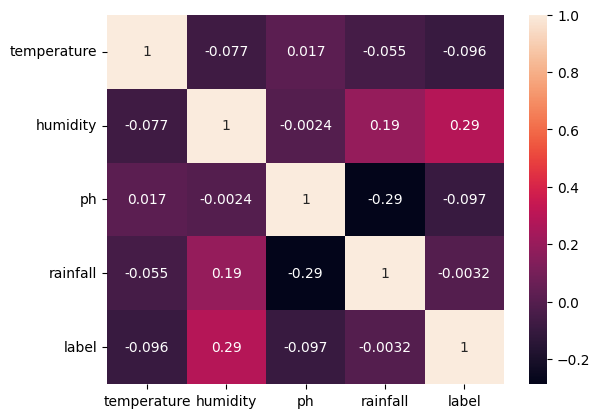

In [5]:
# heatmap
import seaborn as sns

sns.heatmap(db.corr(), annot=True)

In [6]:
# test train split

from sklearn.model_selection import train_test_split

X = db.drop('label', axis=1)
y = db['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (2480, 4)
Test data shape:  (620, 4)


In [7]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

# Predicting the test set results
y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.9193548387096774


In [8]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Fit the model to the training
rfc.fit(X_train, y_train)

# Predicting the test set results
y_pred_rfc = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_rfc)

print("Accuracy: ", accuracy)

Accuracy:  0.9516129032258065


      Actual  Predicted
718        7         15
2953      27         25
1805       1          1
1612      10         10
1190      12         12
      Actual  Predicted
718        7         15
2953      27         25
1805       1          1
1612      10         10
1190      12         12


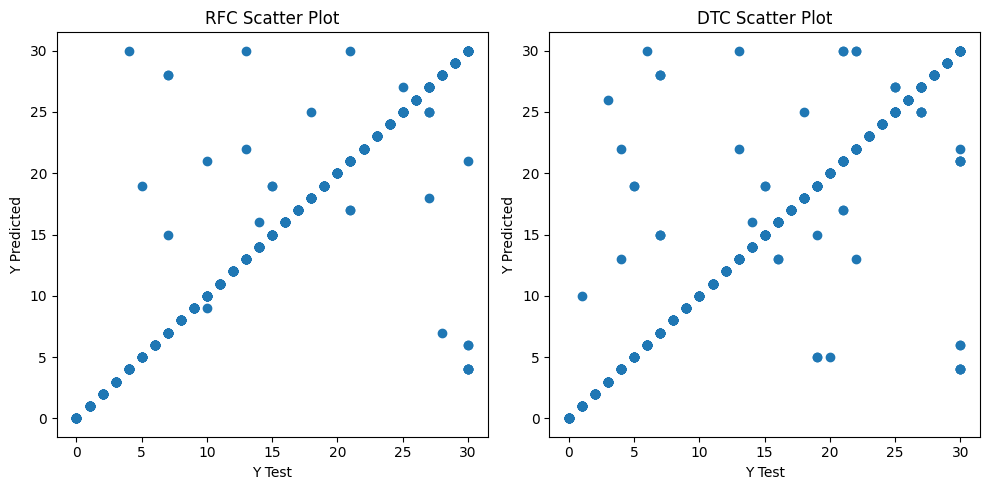


Accuracy of Random Forest Classifier: 95.16%

Accuracy of Decision Tree Classifier: 91.94%

F1 Score of Random Forest Classifier: 0.95

F1 Score of Decision Tree Classifier: 0.92

Random Forest Classifier is better than Decision Tree Classifier


In [9]:
y_pred_rfc = rfc.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfc})
print(df1.head())

y_pred_dtc = dtc.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dtc})
print(df2.head())

# plot df1 and df2 comparision chart

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rfc)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.title('RFC Scatter Plot')
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dtc)
plt.xlabel('Y Test')
plt.title('DTC Scatter Plot')
plt.ylabel('Y Predicted')
plt.tight_layout()
plt.show()

# plot df1 and df2 comparision chart
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)
# print("Confusion Matrix for RFC: \n", cm)

cm = confusion_matrix(y_test, y_pred_dtc)
# print("Confusion Matrix for DTC: \n", cm)

# calculate accuracy score of both models
acc_rfc = rfc.score(X_test, y_test) * 100
print("\nAccuracy of Random Forest Classifier: {:.2f}%".format(acc_rfc))

acc_dtc = dtc.score(X_test, y_test) * 100
print("\nAccuracy of Decision Tree Classifier: {:.2f}%".format(acc_dtc))

# compare the performance of both models using F1-Score
from sklearn.metrics import f1_score
F1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')
F1_dtc = f1_score(y_test, y_pred_dtc, average='weighted')

print('\nF1 Score of Random Forest Classifier: {:.2f}'.format(F1_rfc))
print('\nF1 Score of Decision Tree Classifier: {:.2f}'.format(F1_dtc))

if (F1_rfc >= F1_dtc):
    print("\nRandom Forest Classifier is better than Decision Tree Classifier")
else:
    print("\nDecision Tree Classifier is better than Random Forest Classifier")

<h1>Random Forest Classification</h1>

In [10]:
df_temp = pd.DataFrame([[49.87673602,15.49100816,6.912345828,39.40150564]], columns=['temperature', 'humidity', 'ph', 'rainfall'])
print(le.inverse_transform(rfc.predict(df_temp))[0])

millet


<h1>Decision Tree Classification</h1>

In [11]:
df_temp = pd.DataFrame([[49.87673602,15.49100816,6.912345828,39.40150564]], columns=['temperature', 'humidity', 'ph', 'rainfall'])
print(le.inverse_transform(dtc.predict(df_temp))[0])

millet


In [12]:
23.654521,60.5456131,9,190
25,65,10,186

(25, 65, 10, 186)

In [13]:
#save the model

import pickle

pickle.dump(rfc, open('model.pkl', 'wb'))

print("Model saved")



Model saved


<h2>Readings from Arduino</h2>

In [14]:
#get temperature and humidity values from ardiuno and predict

import serial
import time

ser = serial.Serial('COM7', 9600)
time.sleep(2)
q=[]

while True:
    for i in range(3):
        line = ser.readline().decode('utf-8').rstrip()
        q.append(float(line))
    break   
print(q)


[29.9, 83.0, 977.0]


<h2>Random Forest Classifier</h2>

In [15]:
df_temp = pd.DataFrame([[q[0],q[1],6.912345828,39.40150564]], columns=['temperature', 'humidity', 'ph', 'rainfall'])
print(le.inverse_transform(rfc.predict(df_temp))[0])

Mung Bean


In [16]:
df_temp = pd.DataFrame([[q[0],q[1],7.4656561,60.5611123]], columns=['temperature', 'humidity', 'ph', 'rainfall'])
print(le.inverse_transform(rfc.predict(df_temp))[0])

Cotton
